# GYPSUM PRECIPITATION UPON EVAPORATION

http://hydrochemistry.eu/exmpls/evap.html

In [1]:
%pylab inline
import phreeqpython
pp = phreeqpython.PhreeqPython('phreeqc.dat')

Populating the interactive namespace from numpy and matplotlib


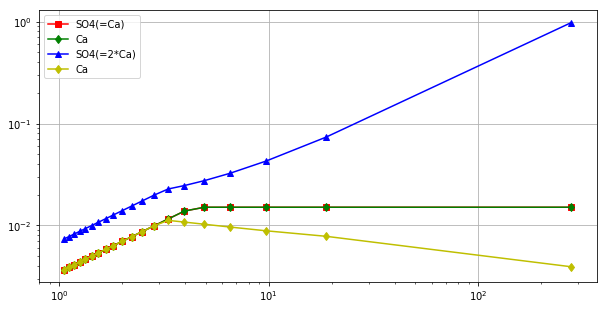

In [30]:
sol1 = pp.add_solution({
    'Ca': 3.5,
    'S(6)': 3.5,
    'Br': 1e-6  # Br used as tracer for evaporation
})


x = []
y = []
y2 = []

for i in range(20):
    # evaporate water
    sol1.remove('H2O', 55.3/20, units='mol')
    sol1.desaturate('Gypsum')
    x.append(sol1.total_element('Br', units='mol')/sol1.mass/1e-9)
    y.append(sol1.total_element('S', units='mol')/ sol1.mass)
    y2.append(sol1.total_element('Ca', units='mol')/ sol1.mass)


sol2 = pp.add_solution({
    'Ca': 3.5,
    'S(6)': 7.0,
    'Br': 1e-6  # Br used as tracer for evaporation
})

    
y3 = []
y4 = []

for i in range(20):
    sol2.remove('H2O', 55.3/20, units='mol')
    sol2.desaturate('Gypsum')
    y3.append(sol2.total_element('S', units='mol')/ sol2.mass)
    y4.append(sol2.total_element('Ca', units='mol')/ sol2.mass)

plt.figure(figsize=[10,5])
    
plt.plot(x,y, 'rs-', label='SO4(=Ca)')
plt.plot(x,y2, 'gd-', label='Ca')
plt.plot(x,y3, 'b^-', label='SO4(=2*Ca)')
plt.plot(x,y4, 'yd-', label='Ca')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()